<a href="https://colab.research.google.com/github/sinhasurapto/Techsaksham_AI_Potato_Leaf_Disease_Prediction/blob/main/train_potato_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import modules
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Folder path
folder_path = "/content/drive/My Drive/"

In [4]:
# Training path
import os
train_path = os.path.join(folder_path, "dataset", "Train")
print(f"Training path: {train_path}")

Training path: /content/drive/My Drive/dataset/Train


In [ ]:
# Validation path
valid_path = os.path.join(folder_path, "dataset", "Valid")
print(f"Validation path: {valid_path}")

Validation path: /content/drive/My Drive/dataset/Valid


In [5]:
# Testing path
test_path = os.path.join(folder_path, "dataset", "Test")
print(f"Testing path: {test_path}")

Testing path: /content/drive/My Drive/dataset/Test


In [ ]:
# Load training dataset
train_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 900 files belonging to 3 classes.


In [ ]:
# Class names in training dataset
train_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# Load validation dataset
valid_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 300 files belonging to 3 classes.


In [ ]:
# Class names in validation dataset
valid_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# Load testing dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 300 files belonging to 3 classes.


In [ ]:
# Class names in testing dataset
test_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# Generate the Convolutional Neural Network (CNN)
cnn = tf.keras.models.Sequential()

# First block
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Second block
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Third block
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Fourth block
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Fifth block
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Remove 25% of the neurons
cnn.add(tf.keras.layers.Dropout(0.25))

# Reduces dimension of the image
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

# Output
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [ ]:
# Compile the CNN
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001
    ),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Summary of the CNN
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
train_history = cnn.fit(x=train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.3457 - loss: 1.7596 - val_accuracy: 0.6100 - val_loss: 1.0550
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.4301 - loss: 1.0505 - val_accuracy: 0.5033 - val_loss: 0.9308
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.6604 - loss: 0.7858 - val_accuracy: 0.7933 - val_loss: 0.4781
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.7743 - loss: 0.5126 - val_accuracy: 0.6667 - val_loss: 0.7838
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7669 - loss: 0.4962 - val_accuracy: 0.8300 - val_loss: 0.4306
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8600 - loss: 0.3190 - val_accuracy: 0.8033 - val_loss: 0.5797
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.8428 - loss: 0.4243 - val_accuracy: 0.9267 - val_loss: 0.2124
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.8959 - loss: 0.2300 - val_accuracy: 0.896

In [ ]:
# Compute training loss and training accuracy
train_loss, train_acc = cnn.evaluate(train_set)
print(f"Training loss: {train_loss}")
print(f"Training accuracy: {train_acc}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9269 - loss: 0.2102
Training loss: 0.19507503509521484
Training accuracy: 0.9344444274902344


In [ ]:
# Compute validation loss and validation accuracy
valid_loss, valid_acc = cnn.evaluate(valid_set)
print(f"Validation loss: {valid_loss}")
print(f"Validation accuracy: {valid_acc}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8941 - loss: 0.2459
Validation loss: 0.25805017352104187
Validation accuracy: 0.8799999952316284


In [ ]:
# Display training history
train_history.history

{'accuracy': [0.3422222137451172,
  0.4655555486679077,
  0.6899999976158142,
  0.7888888716697693,
  0.8111110925674438,
  0.8788889050483704,
  0.8833333253860474,
  0.9111111164093018,
  0.945555567741394,
  0.9222221970558167],
 'loss': [1.3630577325820923,
  1.0287995338439941,
  0.6891359686851501,
  0.47840896248817444,
  0.41788679361343384,
  0.28711414337158203,
  0.3188287019729614,
  0.21673117578029633,
  0.14119820296764374,
  0.1931367963552475],
 'val_accuracy': [0.6100000143051147,
  0.503333330154419,
  0.7933333516120911,
  0.6666666865348816,
  0.8299999833106995,
  0.8033333420753479,
  0.9266666769981384,
  0.8966666460037231,
  0.9233333468437195,
  0.8799999952316284],
 'val_loss': [1.0549980401992798,
  0.9307684302330017,
  0.47807392477989197,
  0.7838425636291504,
  0.4306061267852783,
  0.5797103643417358,
  0.21236158907413483,
  0.22458280622959137,
  0.19239473342895508,
  0.25805020332336426]}

In [ ]:
# Write training history into a JSON file
import json
with open('training_history.json', 'w') as f:
    json.dump(train_history.history, f)

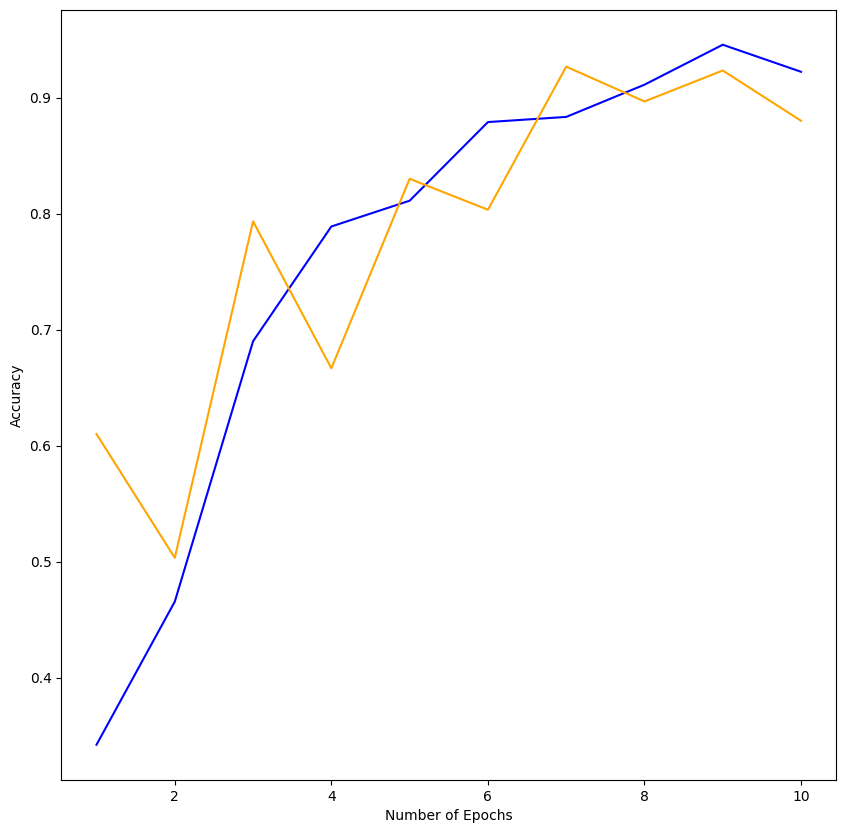

In [ ]:
# Plot accuracy for training and validation for various epochs
epochs = [i for i in range(1, 11)]
plt.figure(figsize=(10, 10))
plt.plot(epochs, train_history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(epochs, train_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Save the model
cnn.save('potato_leaf_disease_detection_model.keras')